In [1]:
import sys
sys.path.append('D:/v1ktop/Drive-INAOE/Code/data_aumentation_for_author_profiling/')

In [2]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [3]:
from word_level_da.preprocessing.load_data import Dataset

In [4]:
 %load_ext autoreload

In [5]:
 %autoreload 2

In [6]:
! pip install multidict

## Explore data

In [7]:
from word_level_da.classifier.explore_data import explore_data
from word_level_da.classifier.feature_extraction import FeatureExtraction
from word_level_da.classifier.svm_text import Svm_Text

## Clave del conjunto de datos

In [11]:
key="depresion18_local"

In [12]:
data_cls=Dataset(key=key, remove_end=True, chunking=True, doc_len=64, min_len=32)

In [13]:
all_training= data_cls.get_dataset(folder_name="prep_chunks_joined", truth_name="train_golden_truth_joined.txt",
                              partition="training")

In [14]:
exp_cls=explore_data(all_training[0], all_training[1], "/", plot_format="png")

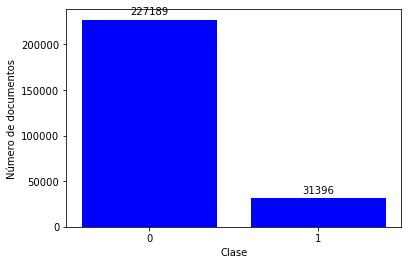

In [15]:
exp_cls.plot_class_distribution()

## Palabras con puntuacion Xi2 < 0.001 (Conjunto original)

In [16]:
 %autoreload 2

In [17]:
p_confidence=0.001
save_words=False
K=None

In [18]:
obj_dir = r"D:\v1ktop\Drive-INAOE\Code\data_aumentation_for_author_profiling\word_level_da\obj"

In [19]:
ft1 = FeatureExtraction(all_training[0], stop_wors=None, use_idf=True)
top_s = ft1.get_chi_2(all_training[1], k=K)

In [20]:
top_original=top_s[top_s["pval"]<0.001]

In [21]:
top_original

,score,pval
depression,787.990749,0.000000
my,608.838685,0.000000
me,437.930654,0.000000
im,387.013767,0.000000
anxiety,337.770950,0.000000
...,...,...
pudge,10.861150,0.000982
un,10.860860,0.000982
story,10.859443,0.000983
union,10.854125,0.000986


In [27]:
top_original.to_csv(r"D:\v1ktop\Drive-INAOE\Code\data_aumentation_for_author_profiling\word_level_da\reports\original.csv", )

In [35]:
parent_save_dir=r"D:\v1ktop\Drive-INAOE\Code\data_aumentation_for_author_profiling\word_level_da\reports"

### Promedio del valor Chi cuadrada

In [28]:
top_s[top_s["pval"]<0.001]["score"].mean()

30.993944025925924

In [29]:
top_s[top_s["pval"]<0.001]["score"].std()

45.544709286438966

## Palabras con puntuacion Xi2 < 0.001 (Conjunto filtrado)

In [30]:
filtered_data= data_cls.get_dataset(folder_name="prep_chunks_filtered", truth_name="golden_truth_filtered.txt",
                              partition="training")

In [31]:
exp_cls=explore_data(filtered_data[0], filtered_data[1], "/", plot_format="png")

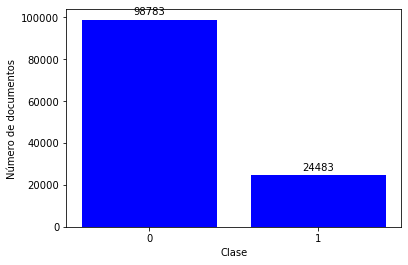

In [32]:
exp_cls.plot_class_distribution()

In [33]:
ft1 = FeatureExtraction(filtered_data[0], stop_wors=None, use_idf=True)
top_filtered = ft1.get_chi_2(filtered_data[1], k=K)

***Solo 401 terminos son significantes despues del filtrado***

In [34]:
top_filtered[top_filtered["pval"]<0.001]

,score,pval
depression,406.479297,0.000000
my,194.734325,0.000000
anxiety,163.138978,0.000000
relationship,158.343738,0.000000
boyfriend,130.309752,0.000000
...,...,...
psych,10.859072,0.000983
national,10.857342,0.000984
cars,10.854468,0.000986
moisturized,10.853590,0.000986


In [36]:
top_original_filtered=top_filtered.loc[top_filtered.index.intersection(list(top_original.index))]

In [37]:
top_original_filtered

,score,pval
depression,406.479297,0.000000
my,194.734325,0.000000
anxiety,163.138978,0.000000
relationship,158.343738,0.000000
boyfriend,130.309752,0.000000
...,...,...
thats,0.030241,0.861944
some,0.008463,0.926702
all,0.006698,0.934774
convergence,0.000598,0.980485


In [38]:
top_original.loc["got"]

score    19.236595
pval      0.000012
Name: got, dtype: float64

In [39]:
import os

In [41]:
top_original_filtered.to_csv(os.path.join(parent_save_dir,"original_filtered.csv"))

## Promedio del valor Chi cuadrada (Conjunto filtrado)

In [42]:
top_original_filtered.score.mean()

12.96899965330848

In [43]:
top_original_filtered.score.std()

20.110998195496652

## Valores CHi cuadrada para el conjunto aumentado

In [44]:
import numpy as np

In [45]:
all_scores=[]

In [46]:
methods=["Xi"]

In [47]:
for method in methods:
    for i in range (1,11):
        prefix = method + str(i)
        folder = method + "/" + prefix
        truth_file = method + "/" + prefix + ".txt"
        docs, l_docs, ids, useless_data = data_cls.get_dataset(folder_name=folder, truth_name=truth_file,
                                                           partition="augmented")

        new_training = np.append(filtered_data[0], docs)
        new_labels = np.append(filtered_data[1], l_docs)

        ft1 = FeatureExtraction(new_training, stop_wors=None, use_idf=True)
        top_sm = ft1.get_chi_2(new_labels, k=K)
        
        all_scores.append(top_sm)

In [48]:
len(all_scores)

10

In [49]:
all_scores[0][all_scores[0].pval<0.001]

,score,pval
depression,413.801609,0.000000
my,303.800554,0.000000
anxiety,237.300253,0.000000
cant,219.683999,0.000000
me,200.916606,0.000000
...,...,...
candidates,10.855297,0.000985
wasd,10.846726,0.000990
sgs,10.844637,0.000991
despised,10.844006,0.000991


### Numero de palabras con p<0.001 para cada aumento n=[1,10]

In [50]:
import matplotlib.pyplot as plt

In [51]:
x=[i for i in range(1,11)]

In [52]:
y=[len(score[score.pval<0.001]) for score in all_scores]

In [53]:
y

[697, 964, 1226, 1433, 1602, 1782, 1957, 2151, 2326, 2522]

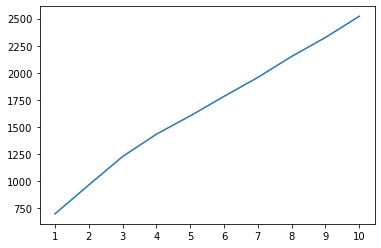

In [84]:
beingsaved = plt.figure()
plt.xticks(x, x)
plt.plot(x,y)
beingsaved.savefig("palabras", format="png")

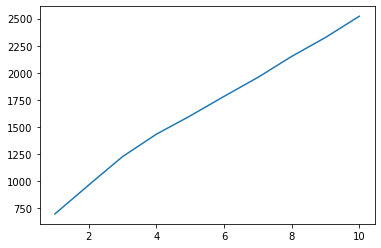

### Puntuación CHi2 promedio en cada aumento n=[1,10] 

In [94]:
mean_all_scores=[score[score.pval<0.001].pval.mean() for score in all_scores]

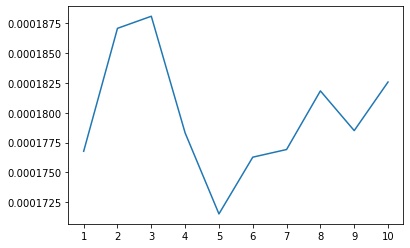

In [95]:
beingsaved = plt.figure()
plt.xticks(x, x)
plt.plot(x,mean_all_scores)
beingsaved.savefig("p_values.png", format="png")

In [97]:
mean_all_scores

[0.0001767715208034433,
 0.00018706827800829876,
 0.00018808159053833605,
 0.00017831023028611306,
 0.00017152433208489386,
 0.00017627721099887765,
 0.00017691861011752684,
 0.00018182866573686658,
 0.0001785014789337919,
 0.00018257313243457576]

### Numero de palabras que se siguen conservando del conjunto original

In [57]:
original_words_scores=[score.loc[score.index.intersection(list(top_original.index))] for score in all_scores]

In [58]:
original_words_scores[0][original_words_scores[0].pval<0.001]

,score,pval
depression,413.801609,0.000000
my,303.800554,0.000000
anxiety,237.300253,0.000000
cant,219.683999,0.000000
me,200.916606,0.000000
...,...,...
adorable,10.876140,0.000974
child,10.865931,0.000979
wasd,10.846726,0.000990
sgs,10.844637,0.000991


In [59]:
y1=[len(score[score.pval<0.001]) for score in original_words_scores]

In [99]:
y1

[515, 568, 590, 603, 623, 624, 637, 642, 646, 653]

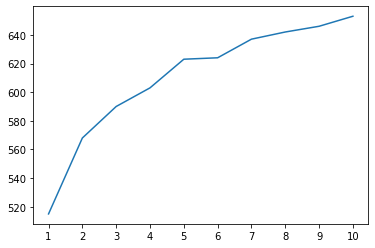

In [100]:
beingsaved = plt.figure()
plt.xticks(x, x)
plt.plot(x,y1)
beingsaved.savefig("original_conservadas.png", format="png")

### Guardar lista de palabras

In [71]:
for i, word_list in enumerate (original_words_scores):
    file_name="Xi_"+str(i+1)+".csv"
    word_list.to_csv(os.path.join(parent_save_dir,file_name))

***Variacion promedio de los valores de chi cuadrada en cada aumento***

In [72]:
mean_scores=[values.score.mean() for values in original_words_scores]

In [73]:
mean_scores

[17.24742845666356,
 20.554960505125816,
 23.106998956197582,
 25.214427145386768,
 26.958931720410064,
 28.519221370922647,
 29.906375130475304,
 31.129446220876044,
 32.31616947903075,
 33.36925272879776]

In [74]:
no_aumento=[top_original_filtered.score.mean()]*10

In [75]:
no_aumento

[12.96899965330848,
 12.96899965330848,
 12.96899965330848,
 12.96899965330848,
 12.96899965330848,
 12.96899965330848,
 12.96899965330848,
 12.96899965330848,
 12.96899965330848,
 12.96899965330848]

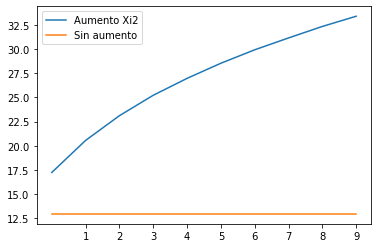

In [101]:
beingsaved = plt.figure()
plt.xticks(x, x)
plt.plot(mean_scores)
plt.plot(no_aumento)
plt.legend(["Aumento Xi2", "Sin aumento"])
beingsaved.savefig("promedio_comservadas.png", format="png")

***Variacion promedio de los valores p en cada aumento***

In [77]:

mean_pvalues=[values.pval.mean() for values in original_words_scores]

In [78]:
mean_pvalues

[0.03172721296365331,
 0.02856742948741845,
 0.026551910037278657,
 0.02527524041006524,
 0.024252998881640262,
 0.02316058234855545,
 0.022843842945013976,
 0.022529993783783786,
 0.022303132562907738,
 0.02244181662628145]

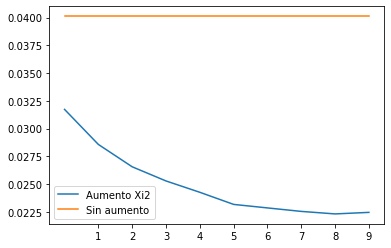

In [108]:
beingsaved = plt.figure()
plt.xticks(x, x)
plt.plot(mean_pvalues)
plt.plot(no_aumento2)
plt.legend(["Aumento Xi2", "Sin aumento"])
beingsaved.savefig("promediop_comservadas.png", format="png")

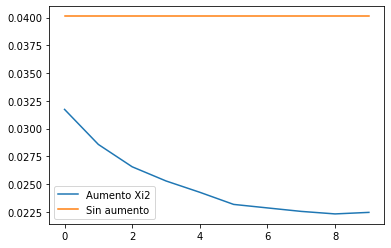

***Podria decirse que la probabilidad de los terminos originales apartir de 5 no cambia***